In [1]:
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from coroner.crawl_data import CURRENT_SPECIES, CURRENT_BGS
from vis_common import load_store, load_games

store = load_store()
games = load_games(extra_tables='skills')
g = games
FS = (10, 6) # Reasonable default figsize

In [2]:
# for simplicity, let's limit to species/bgs currently in the game
g2 = g[g['species'].isin(CURRENT_SPECIES) & g['bg'].isin(CURRENT_BGS)]
print "After filtering out old species/bgs, went from {} games to {} (-{})".format(
    len(g), len(g2), len(g)-len(g2)
)
g = g2

After filtering out old species/bgs, went from 1327938 games to 1297305 (-30633)


In [3]:
wpp = wins_per_pid = g.groupby('pid')['won'].sum()
winpids = wpp.where(lambda wins: wins > 0).dropna().index
iwinner = g['pid'].isin(winpids)

In [4]:
combos = g.groupby(['orig_species', 'bg']).size().rename('count')
combo_table = combos.reset_index(level=1).pivot(columns='bg', values='count')
combo_table

bg,warper,enchanter,necromancer,chaos knight,hunter,air elementalist,berserker,arcane marksman,ice elementalist,gladiator,...,wanderer,wizard,monk,earth elementalist,conjurer,abyssal knight,venom mage,skald,assassin,fire elementalist
orig_species,,,,,,,,,,,,,,,,,,,,,
centaur,691.0,89.0,90.0,352.0,9910.0,145.0,661.0,1745.0,110.0,1116.0,...,305.0,141.0,788.0,83.0,86.0,484.0,119.0,280.0,75.0,129.0
deep dwarf,430.0,110.0,3979.0,127.0,847.0,77.0,2558.0,80.0,110.0,520.0,...,313.0,98.0,285.0,2037.0,116.0,430.0,89.0,132.0,216.0,76.0
deep elf,411.0,1271.0,3522.0,293.0,214.0,1989.0,533.0,597.0,3287.0,258.0,...,761.0,21702.0,414.0,2200.0,26091.0,236.0,1377.0,312.0,189.0,17125.0
demigod,309.0,235.0,327.0,NaN,308.0,868.0,NaN,241.0,875.0,955.0,...,2548.0,1190.0,455.0,1052.0,1855.0,NaN,233.0,1806.0,362.0,1387.0
demonspawn,1423.0,677.0,7757.0,6388.0,2744.0,845.0,13941.0,456.0,3260.0,23953.0,...,8164.0,8233.0,15912.0,1865.0,3163.0,18286.0,2344.0,6940.0,3218.0,4124.0
draconian,1130.0,220.0,613.0,1129.0,282.0,1661.0,4708.0,148.0,2014.0,1147.0,...,3481.0,3195.0,4761.0,1300.0,8429.0,1962.0,1422.0,2987.0,381.0,3229.0
felid,2718.0,2048.0,566.0,828.0,NaN,452.0,3536.0,NaN,437.0,NaN,...,789.0,494.0,3289.0,153.0,1618.0,366.0,989.0,398.0,NaN,450.0
formicid,734.0,486.0,222.0,708.0,1413.0,305.0,607.0,714.0,97.0,737.0,...,705.0,490.0,711.0,2149.0,139.0,5021.0,1340.0,913.0,339.0,150.0
gargoyle,357.0,289.0,243.0,740.0,668.0,186.0,6895.0,160.0,803.0,5185.0,...,792.0,3973.0,4603.0,14499.0,1042.0,1574.0,1438.0,1228.0,390.0,3402.0


In [5]:
combos.sort_values(ascending=0).head(10)

orig_species  bg       
minotaur      fighter      47129
              berserker    33620
gargoyle      fighter      28869
deep elf      conjurer     26091
spriggan      enchanter    25369
demonspawn    fighter      24580
              gladiator    23953
deep elf      wizard       21702
formicid      fighter      21387
hill orc      fighter      19789
Name: count, dtype: int64

In [6]:
combos.xs('deep elf', level=0).sort_values(ascending=0)

bg
conjurer              26091
wizard                21702
fire elementalist     17125
necromancer            3522
ice elementalist       3287
summoner               3054
earth elementalist     2200
air elementalist       1989
venom mage             1377
enchanter              1271
wanderer                761
arcane marksman         597
berserker               533
fighter                 479
artificer               447
monk                    414
warper                  411
skald                   312
chaos knight            293
gladiator               258
abyssal knight          236
hunter                  214
assassin                189
transmuter              141
Name: count, dtype: int64

In [11]:
ideep = (g['species'] == 'deep elf') & g['bg'].isin({'conjurer', 'wizard'})
print "Considering {} deep elf games, of which {} were won".format(
    ideep.sum(), (ideep & g['won']).sum(),
)

Considering 47793 deep elf games, of which 162 were won


In [16]:
print "{:.2f}% win rate vs. DE overall avg of {:.2f} vs. DD avg. of {:.2f}".format(
    g[ideep]['won'].mean() * 100, 100* g[g['species']=='deep elf']['won'].mean(), 
    g[g['species']=='deep dwarf']['won'].mean() * 100,
)

0.34% win rate vs. DE overall avg of 0.44 vs. DD avg. of 2.23


In [18]:
g.columns

Index([u'bg', u'bot', u'first_conversion', u'god', u'gold_collected',
       u'gold_spent', u'howdied', u'hunger', u'level', u'nrunes', u'pid',
       u'religious_experiences', u'score', u'species', u'temple_depth',
       u'temple_xl', u'time', u'turns', u'version', u'whereconverted',
       u'wheredied', u'won', u'orig_species', u'legit', u'skill_air magic',
       u'skill_armour', u'skill_axes', u'skill_bows', u'skill_charms',
       u'skill_conjurations', u'skill_crossbows', u'skill_dodging',
       u'skill_earth magic', u'skill_evocations', u'skill_fighting',
       u'skill_fire magic', u'skill_hexes', u'skill_ice magic',
       u'skill_invocations', u'skill_long blades', u'skill_maces & flails',
       u'skill_necromancy', u'skill_poison magic', u'skill_polearms',
       u'skill_shields', u'skill_short blades', u'skill_slings',
       u'skill_spellcasting', u'skill_stabbing', u'skill_staves',
       u'skill_stealth', u'skill_summonings', u'skill_throwing',
       u'skill_transloc

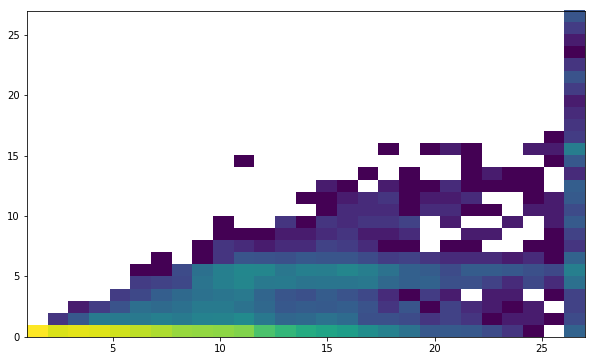

In [55]:
from matplotlib import colors
n = 10**9
df = g.loc[ideep, ['level', 'skill_shields']].head(n)
# TODO: It's kinda sucky that I have to do this. Should probably file an issue.
df['level'] = df['level'].astype(int)
fig, ax = plt.subplots(figsize=FS)
#df.plot.scatter(x='level', y='skill_shields', figsize=FS);
#ax.hexbin(df['level'].values, df['skill_shields'].values, bins='log', gridsize=27,);
ax.hist2d(df['level'].values, df['skill_shields'].values, bins=[27,27],
          norm=colors.LogNorm(),
         );
#ax.set_xticks(range(1, 28));
#ax.set_xticklabels([str(x) for x in ax.get_xticks()]);

17737


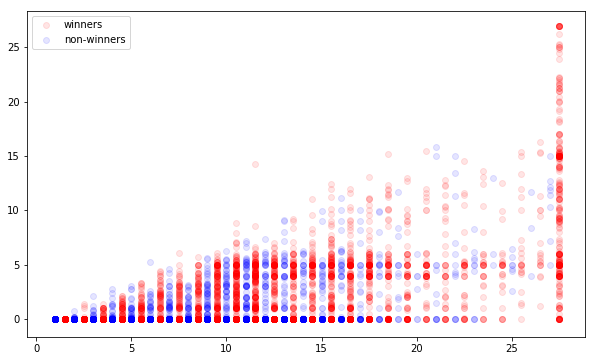

In [66]:
# Plot the same number of points for winners/non-winners
n = min(len(df.loc[iwinner]), len(df.loc[~iwinner]))
fig, ax = plt.subplots(figsize=FS)
ax.scatter(df.loc[iwinner]['level'].head(n).values+.5, df.loc[iwinner]['skill_shields'].head(n).values, alpha=.1, 
           label='winners', color='red');
ax.scatter(df.loc[~iwinner]['level'].head(n).values, df.loc[~iwinner]['skill_shields'].head(n).values, alpha=.1, 
           label='non-winners', color='blue');
ax.legend();

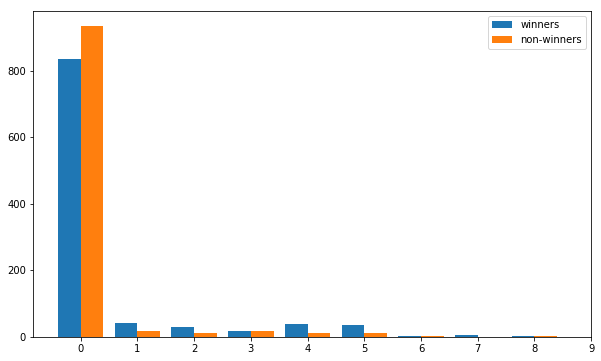

In [87]:
lvl = 10
i10 = df['level'] == 10
n = min( (i10&iwinner).sum(), (i10&~iwinner).sum() )
fig, ax = plt.subplots(figsize=FS)
bins = np.arange(10)
x = df.loc[i10&iwinner, 'skill_shields'].head(n).values
y = df.loc[i10&~iwinner, 'skill_shields'].head(n).values
ax.hist([
    x,
    y,
    ],
    bins=bins,
    label=['winners', 'non-winners']
)
ax.legend();
ax.set_xticks(bins+.5)
ax.set_xticklabels([str(int(x_)) for x_ in bins]);
# So this works fairly well, but it would be nice to be able to show more 
# than one player level in a single chart.

In [93]:
df.head()

,level,skill_shields
338,12,0.0
415,8,0.0
418,5,0.0
461,4,0.0
480,5,0.0


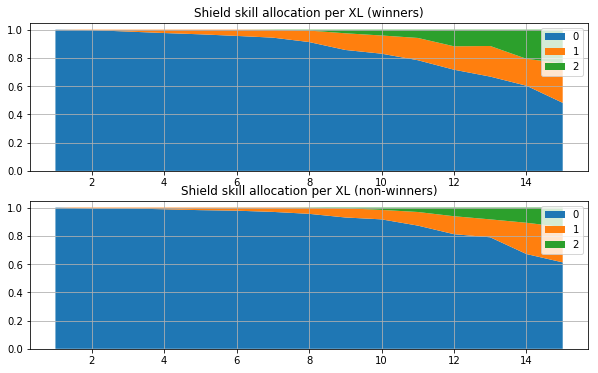

In [116]:
# Two area charts, one for winners, one for non-winners. 
# X-axis = level. Groups = shield skill, partitioned into ranges
fig, (ax1, ax2) = plt.subplots(2, figsize=FS)

bins = [0, 0.1, 5, 16, 27]
for ax, idx, label in zip([ax1, ax2], [iwinner, ~iwinner], ['winners', 'non-winners']):
    df2 = df.loc[idx & (df['level'] < 16)]
    foo = df2.groupby('level')['skill_shields'].apply(lambda x: np.histogram(x, bins)[0])
    foo = foo.apply(pd.Series)
    # Normalize each row to sum to 0
    foo = foo.apply(lambda row: row / row.sum(), axis=1)
    ax.stackplot(foo.index, foo.values.T, labels=range(3), )
    ax.set_title('Shield skill allocation per XL ({})'.format(label))
    ax.grid()
    ax.legend()

#ax1.stackplot()

In [246]:
def compare_skill_allocation_at_level(skill_col, lvl, df=g, ax=None,
                                      group_indices=(iwinner, ~iwinner),
                                      group_names=('winners', 'non-winners'),
                                     ):
    colors = ['red', 'blue']
    if not skill_col.startswith('skill_'):
        skill_col = 'skill_' + skill_col
    i10 = df['level'] == lvl
    indices = [(gi & i10) for gi in group_indices]
    n = min(i.sum() for i in indices)
    if ax is None:
        fig, ax = plt.subplots(figsize=FS)
    #bins = np.arange(10)
    
    hist = True
    order = 1
    if hist:
        for i, label, color in zip(indices, group_names, colors):
            # TODO: more bins? plt.step?
            skill_lvls = df.loc[i, skill_col].sample(n, random_state=1337).values
            ax.step(np.sort(skill_lvls)[::order], np.arange(len(skill_lvls)), 
                    linestyle=':', lw=.75,
                    #label=label,
                    color=color
                   )
            #counts, bins = np.histogram(df.loc[i, skill_col].head(n).values)
            #ax.step(bins[:-1], counts.sum() - np.cumsum(counts), label=label)
    
    if hist:
        ax.hist([df.loc[i, skill_col].head(n).values for i in indices],
            #bins=bins,
            label=group_names,
                color=colors,
        )
    ax.legend();
    #ax.set_xticks(bins+.5)
    #ax.set_xticklabels([str(int(x_)) for x_ in bins])
    ax.set_title("{} level at XL {}".format(skill_col[len('skill_'):], lvl))
    # So this works fairly well, but it would be nice to be able to show more 
    # than one player level in a single chart.
    

    

In [ ]:
skills = ['fighting', 'short blades', 'armour', 'dodging', 'shields', 
          'spellcasting', 'conjurations', 'evocations', 'stealth']

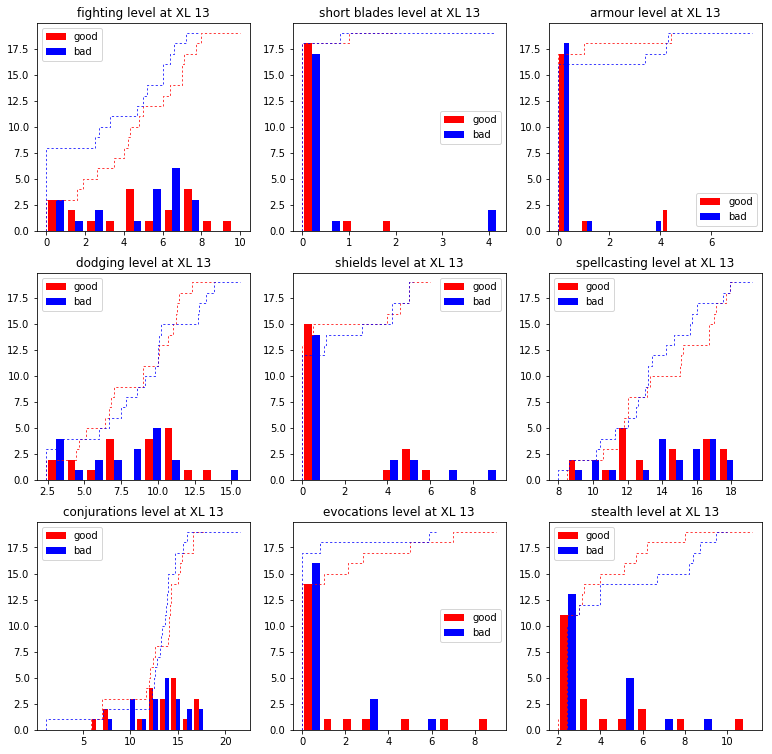

In [249]:
lvl = 13
fig, axes = plt.subplots(3, 3, figsize=(13, 13))
for skill, ax in zip(skills, axes.flatten()):
    compare_skill_allocation_at_level(skill, lvl, g[ideep], ax=ax,
                                group_indices=(gidx, bidx),
                                group_names=('good', 'bad'),   
                                )

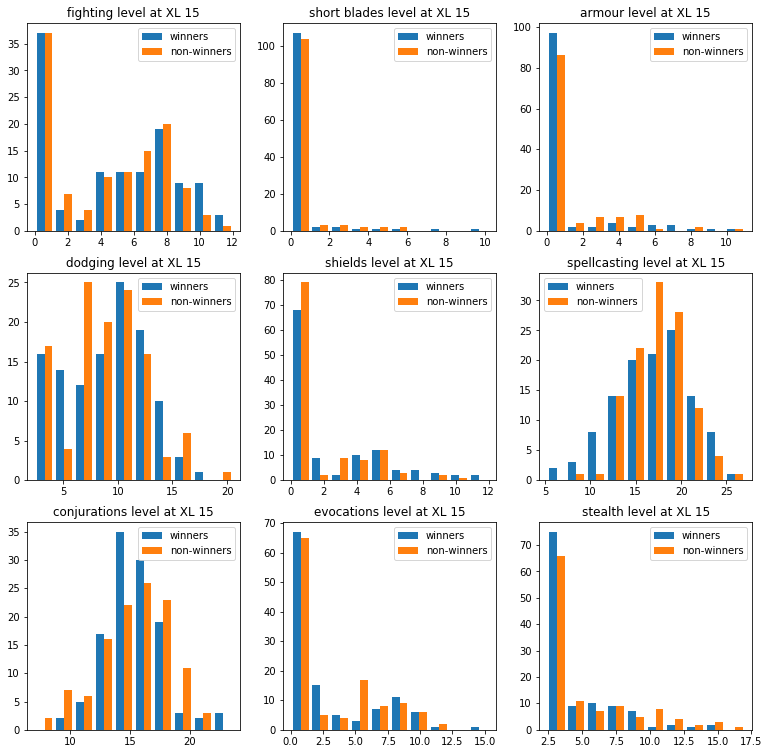

In [133]:
fig, axes = plt.subplots(3, 3, figsize=(13, 13))
for skill, ax in zip(skills, axes.flatten()):
    compare_skill_allocation_at_level(skill, 15, g[ideep], ax=ax)

In [143]:
min_games = 20
wr_per_pid = g[iwinner].groupby('pid').filter(lambda g: len(g) >= min_games)\
    .groupby('pid')['won'].mean() * 100
wr_per_pid.describe([.1, .25, .5, .75, .9])

count    1754.000000
mean        3.019993
std         5.674893
min         0.012255
10%         0.256199
25%         0.590846
50%         1.447529
75%         3.069775
90%         6.666667
max        72.289157
Name: won, dtype: float64

In [144]:
quantile = .25
goodpids = wr_per_pid[wr_per_pid >= wr_per_pid.quantile(1-quantile)].index
badpids = wr_per_pid[wr_per_pid <= wr_per_pid.quantile(quantile)].index

gidx = g['pid'].isin(goodpids)
bidx = g['pid'].isin(badpids)

In [150]:
g[gidx|bidx].groupby(['orig_species', 'bg']).size().sort_values(ascending=0).head(10)

orig_species  bg        
minotaur      fighter       1187
              berserker     1170
spriggan      enchanter     1035
troll         monk          1030
octopode      transmuter     962
gargoyle      fighter        853
demonspawn    gladiator      834
formicid      fighter        831
draconian     transmuter     813
deep elf      conjurer       791
dtype: int64

In [164]:
g[(g['species']=='minotaur') & (g['bg'] == 'fighter') & (gidx|bidx)].groupby('level').size()

level
1      139
2      464
3     1029
4     1361
5     1262
6     1076
7      947
8      825
9      841
10     829
11     790
12     477
13     312
14     244
15     229
16     252
17     200
18     108
19      88
20      79
21      68
22      57
23      37
24      29
25      38
26      57
27     391
dtype: int64

In [ ]:
df = g[(g['species']=='minotaur') & (g['bg'] == 'fighter') & (g['nrunes']<=3)]

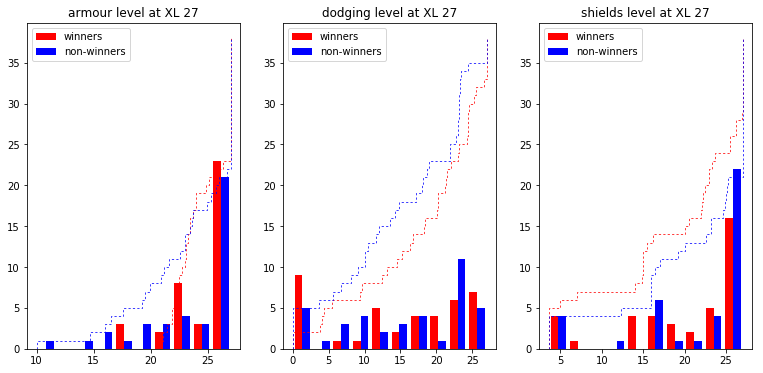

In [248]:
lvl = 27
def_skills = ['armour', 'dodging', 'shields']
fig, axes = plt.subplots(ncols=len(def_skills), figsize=(13, 6))
for skill, ax in zip(def_skills, axes.flatten()):
    compare_skill_allocation_at_level(skill, lvl, df=df, ax=ax,
                                     #group_indices=(gidx, bidx),
                                     #group_names=('good', 'bad'),
                                     )

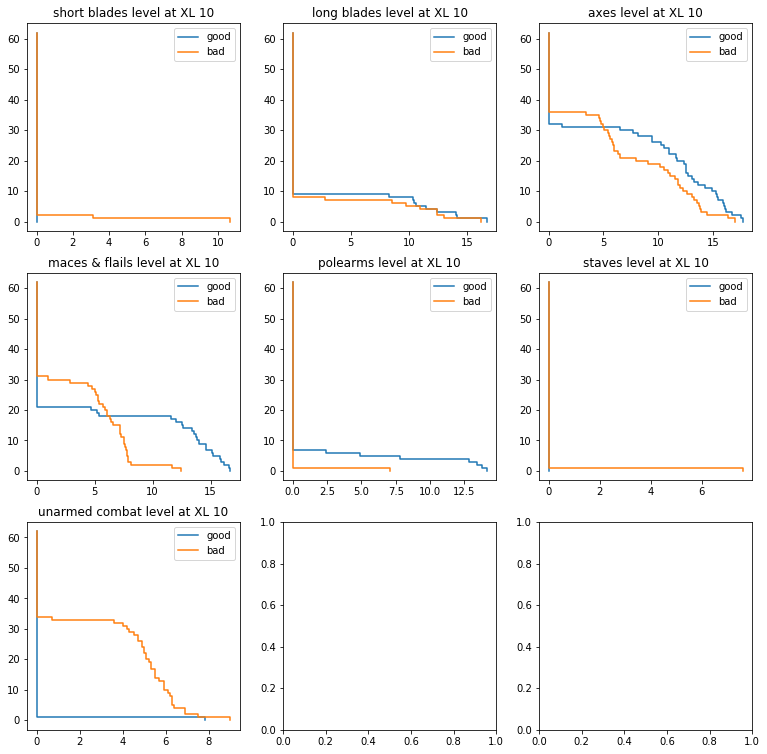

In [202]:
lvl = 10
# Melee weapon skills
weap_skills = ['short blades', 'long blades', 'axes', 'maces & flails', 
               'polearms', 'staves', 'unarmed combat']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
for skill, ax in zip(weap_skills, axes.flatten()):
    compare_skill_allocation_at_level(skill, lvl, df=df, ax=ax,
                                     group_indices=(gidx, bidx),
                                      group_names=('good', 'bad'),
                                     )

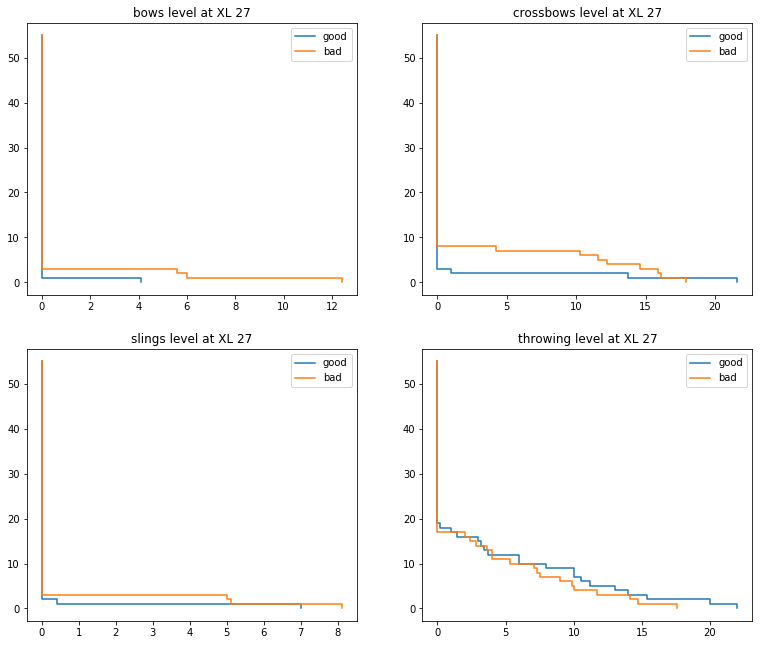

In [203]:
lvl = 27
# ranged weapon skills
ranged_skills = ['bows', 'crossbows', 'slings', 'throwing']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 11))
for skill, ax in zip(ranged_skills, axes.flatten()):
    compare_skill_allocation_at_level(skill, lvl, df=df, ax=ax,
                                     group_indices=(gidx, bidx),
                                      group_names=('good', 'bad'),
                                     )

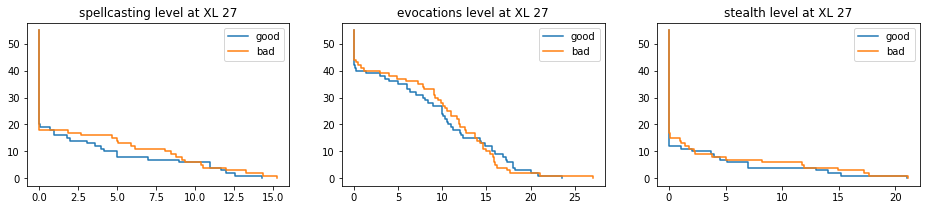

In [204]:
lvl = 27
misc = ['spellcasting', 'evocations', 'stealth']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 3))
for skill, ax in zip(misc, axes.flatten()):
    compare_skill_allocation_at_level(skill, lvl, df=df, ax=ax,
                                         group_indices=(gidx, bidx),
                                          group_names=('good', 'bad'),
                                      cumulative=-1,
                                         )

(281,)
(48,)
(70,)


25206    11
3531      4
11069     3
5900      3
23366     3
13903     2
13445     2
8068      2
3963      2
8346      2
Name: pid, dtype: int64